# Despesas e Receita Eleitoral de São Paulo (2018 e 2020)
> Nomes: **Leonardo G. Ribeiro** | **Thiago da Silva**

---

In [1]:
import pandas as pd
low_memory=False
import matplotlib.pyplot as plt


%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

file18 = [
    r"C:\Despesas_dos_Candidatos\data\2018\despesas_pagas_candidatos_2018_SP.csv",
    r"C:\Despesas_dos_Candidatos\data\2018\despesas_contratadas_candidatos_2018_SP.csv",
    r"C:\Despesas_dos_Candidatos\data\2018\receitas_candidatos_2018_SP.csv"
]


file20 = [
    r"C:\Despesas_dos_Candidatos\data\2020\despesas_pagas_candidatos_2020_SP.csv",
    r"C:\Despesas_dos_Candidatos\data\2020\despesas_contratadas_candidatos_2020_SP.csv",
    r"C:\Despesas_dos_Candidatos\data\2020\receitas_candidatos_2020_SP.csv"
]

---
### Dados de 2018

In [2]:
d_pagas18 = pd.read_csv(file18[0], delimiter=";",encoding="Latin-1",error_bad_lines=False,
                       usecols=["SG_UF", "DS_ORIGEM_DESPESA", "DS_DESPESA", "VR_PAGTO_DESPESA"])

d_contr18 = pd.read_csv(file18[1], delimiter=";",encoding="Latin-1",error_bad_lines=False,
                       usecols=["DS_CARGO", "NM_CANDIDATO", "DS_DESPESA", "VR_DESPESA_CONTRATADA"])

receita18 = pd.read_csv(file18[2], delimiter=";",encoding="Latin-1",error_bad_lines=False,
                       usecols=["DS_CARGO", "NM_CANDIDATO", "SG_PARTIDO", "NM_PARTIDO", "VR_RECEITA"])

---
### Dados de 2020

In [3]:
d_pagas20 = pd.read_csv(file20[0], delimiter=";",encoding="Latin-1",error_bad_lines=False,
                       usecols=["SG_UF", "DS_ORIGEM_DESPESA", "DS_DESPESA", "VR_PAGTO_DESPESA"])

d_contr20 = pd.read_csv(file20[1], delimiter=";",encoding="Latin-1",error_bad_lines=False,
                       usecols=["DS_CARGO", "NM_CANDIDATO", "DS_DESPESA", "VR_DESPESA_CONTRATADA"])

receita20 = pd.read_csv(file20[2], delimiter=";",encoding="Latin-1",error_bad_lines=False,
                       usecols=["DS_CARGO", "NM_CANDIDATO", "SG_PARTIDO", "NM_PARTIDO", "VR_RECEITA"])

---
###  Trocando o `type` dos campos numéricos

In [4]:
d_pagas18.VR_PAGTO_DESPESA = d_pagas18.VR_PAGTO_DESPESA.apply(lambda x: float(x.replace(",",".")))
d_contr18.VR_DESPESA_CONTRATADA = d_contr18.VR_DESPESA_CONTRATADA.apply(lambda x: float(x.replace(",",".")))
receita18.VR_RECEITA = receita18.VR_RECEITA.apply(lambda x: float(x.replace(",",".")))

print("Total de 2018:\n")

print(f"    Despesas pagas: R$ {sum(d_pagas18.VR_PAGTO_DESPESA):.3f}")
print(f"    Despesas contratadas: R$ {sum(d_contr18.VR_DESPESA_CONTRATADA):.3f}")
print(f"    Receita arrecadada: R$ {sum(receita18.VR_RECEITA):.3f}")

Total de 2018:

    Despesas pagas: R$ 411832608.950
    Despesas contratadas: R$ 422563870.160
    Receita arrecadada: R$ 452642041.350


In [5]:
d_pagas20.VR_PAGTO_DESPESA = d_pagas20.VR_PAGTO_DESPESA.apply(lambda x: float(x.replace(",",".")))
d_contr20.VR_DESPESA_CONTRATADA = d_contr20.VR_DESPESA_CONTRATADA.apply(lambda x: float(x.replace(",",".")))
receita20.VR_RECEITA = receita20.VR_RECEITA.apply(lambda x: float(x.replace(",",".")))

print("Total de 2020:\n")

print(f"    Despesas pagas: R$ {sum(d_pagas20.VR_PAGTO_DESPESA):.3f}")
print(f"    Despesas contratadas: R$ {sum(d_contr20.VR_DESPESA_CONTRATADA):.3f}")
print(f"    Receita arrecadada: R$ {sum(receita20.VR_RECEITA):.3f}")

Total de 2020:

    Despesas pagas: R$ 244222384.820
    Despesas contratadas: R$ 329548124.450
    Receita arrecadada: R$ 541636978.900


---

In [6]:
d_pagas18.sample(3)

,SG_UF,DS_ORIGEM_DESPESA,DS_DESPESA,VR_PAGTO_DESPESA
66505,SP,Serviços próprios prestados por terceiros,Serviços próprios prestados por terceiros,500.0
155226,SP,Despesas com pessoal,Despesas com pessoal,570.0
49327,SP,Serviços prestados por terceiros,Serviços prestados por terceiros,500.0


In [7]:
d_contr18.sample(3)

,SG_UF,NM_UE,DS_CARGO,NM_CANDIDATO,NR_PARTIDO,SG_PARTIDO,DS_TIPO_FORNECEDOR,DS_ORIGEM_DESPESA,DS_DESPESA,VR_DESPESA_CONTRATADA
127780,SP,SÃO PAULO,Deputado Federal,JOSÉ ANÍBAL PERES DE PONTES,45,PSDB,Pessoa Física,Atividades de militância e mobilização de rua,EQUIPE ARARAQUARA,600.0
8552,SP,SÃO PAULO,Deputado Federal,SAMIA DE SOUZA BOMFIM,50,PSOL,Pessoa Jurídica,Correspondências e despesas postais,SEDEX A VISTA CEP DESTINO 06075-080 (SP),20.1
222603,SP,SÃO PAULO,Deputado Federal,ANTONIO DONIZETE LIMA DE ALENCAR,45,PSDB,Pessoa Jurídica,"Encargos financeiros, taxas bancárias e/ou op....",TAR SAQ AG,2.5


In [8]:
receita18.sample(3)

,SG_UF,NM_UE,DS_CARGO,NM_CANDIDATO,SG_PARTIDO,NM_PARTIDO,DS_FONTE_RECEITA,DS_ORIGEM_RECEITA,DS_NATUREZA_RECEITA,DS_ESPECIE_RECEITA,DS_CNAE_DOADOR,VR_RECEITA
45185,SP,SÃO PAULO,Deputado Federal,ARLINDO PEREIRA FIGUEIREDO JUNIOR,PHS,Partido Humanista da Solidariedade,Outros Recursos,Recursos próprios,Financeiro,Transferência eletrônica,#NULO#,40000.0
44596,SP,SÃO PAULO,Deputado Estadual,CAIO CESAR MACHADO DA CUNHA,PV,Partido Verde,Outros Recursos,Recursos de pessoas físicas,Financeiro,Depósito em espécie,#NULO#,1000.0
11307,SP,SÃO PAULO,Deputado Federal,WILSON JAMBERG,PRTB,Partido Renovador Trabalhista Brasileiro,Outros Recursos,Recursos de pessoas físicas,Financeiro,Depósito em espécie,#NULO#,10.0


---

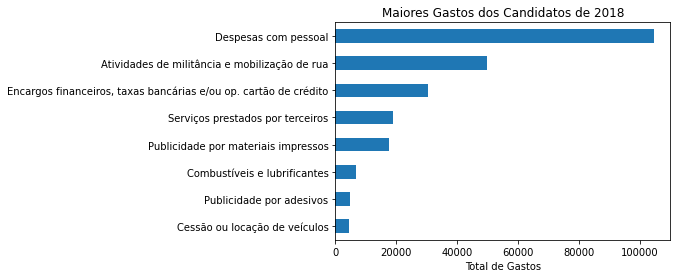

In [9]:
teste = d_pagas18.groupby("DS_DESPESA").count()["SG_UF"]
teste.sort_values().tail(8).plot(kind="barh")

plt.title("Maiores Gastos dos Candidatos de 2018")
plt.xlabel("Total de Gastos")
plt.ylabel("")

plt.show()

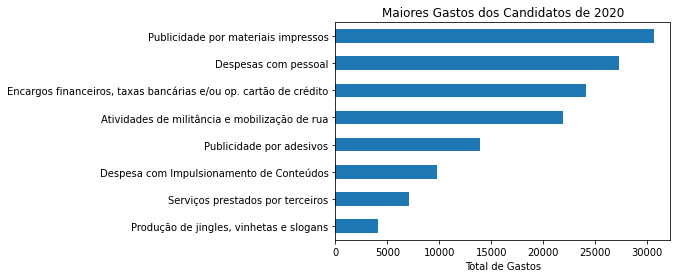

In [10]:
teste = d_pagas20.groupby("DS_DESPESA").count()["SG_UF"]
teste.sort_values().tail(8).plot(kind="barh")

plt.title("Maiores Gastos dos Candidatos de 2020")
plt.xlabel("Total de Gastos")
plt.ylabel("")

plt.show()

---

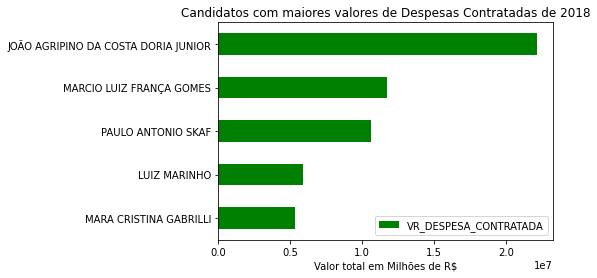

In [11]:
candidatos18 = d_contr18[["NM_CANDIDATO","VR_DESPESA_CONTRATADA"]
               ].sort_values("VR_DESPESA_CONTRATADA").groupby("NM_CANDIDATO").mean()
despesas18 = d_contr18[["NM_CANDIDATO","VR_DESPESA_CONTRATADA"]]

for x in range(len(candidatos18.index)):
    candidatos18.values[x] = sum(despesas18[despesas18.NM_CANDIDATO == candidatos18.index.values[x]].VR_DESPESA_CONTRATADA)

    
candidatos18.sort_values("VR_DESPESA_CONTRATADA").tail(5).plot(kind="barh", color="green")

plt.title("Candidatos com maiores valores de Despesas Contratadas de 2018")
plt.xlabel("Valor total em Milhões de R$")
plt.ylabel("")

plt.show()

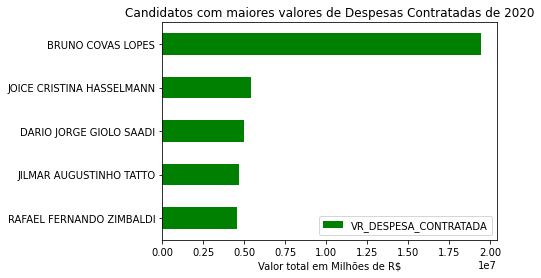

In [65]:
candidatos20 = d_contr20[["NM_CANDIDATO","VR_DESPESA_CONTRATADA"]
               ].sort_values("VR_DESPESA_CONTRATADA").groupby("NM_CANDIDATO").mean()
despesas20 = d_contr20[["NM_CANDIDATO","VR_DESPESA_CONTRATADA"]]

for x in range(len(candidatos20.index)):
    candidatos20.values[x] = sum(despesas20[despesas20.NM_CANDIDATO == candidatos20.index.values[x]].VR_DESPESA_CONTRATADA)

    
candidatos20.sort_values("VR_DESPESA_CONTRATADA").tail(5).plot(kind="barh", color="green")

plt.title("Candidatos com maiores valores de Despesas Contratadas de 2020")
plt.xlabel("Valor total em Milhões de R$")
plt.ylabel("")

plt.show()

---

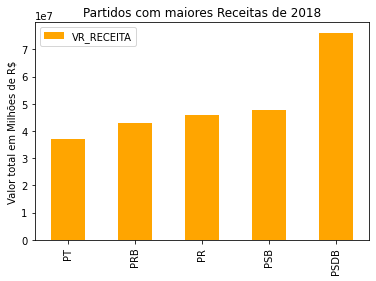

In [87]:
r_partido18 = receita18[["SG_PARTIDO","VR_RECEITA"]].sort_values("VR_RECEITA").groupby("SG_PARTIDO").mean()

r_valor18 = receita18[["SG_PARTIDO","VR_RECEITA"]]

for y in range(len(r_partido18.index)):
    r_partido18.values[y] = sum(r_valor18[r_valor18.SG_PARTIDO == r_partido18.index.values[y]].VR_RECEITA)


r_partido18.sort_values("VR_RECEITA").tail(5).plot(kind="bar", color="orange")

plt.title("Partidos com maiores Receitas de 2018")
plt.xlabel("")
plt.ylabel("Valor total em Milhões de R$")

plt.show()

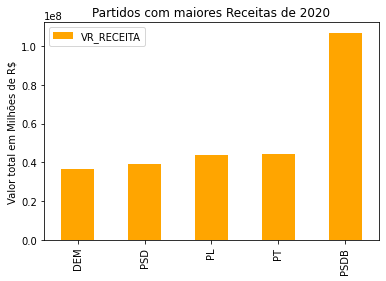

In [89]:
r_partido20 = receita20[["SG_PARTIDO","VR_RECEITA"]].sort_values("VR_RECEITA").groupby("SG_PARTIDO").mean()

r_valor20 = receita20[["SG_PARTIDO","VR_RECEITA"]]

for y in range(len(r_partido20.index)):
    r_partido20.values[y] = sum(r_valor20[r_valor20.SG_PARTIDO == r_partido20.index.values[y]].VR_RECEITA)


r_partido20.sort_values("VR_RECEITA").tail(5).plot(kind="bar", color="orange")

plt.title("Partidos com maiores Receitas de 2020")
plt.xlabel("")
plt.ylabel("Valor total em Milhões de R$")

plt.show()

---